# Voice Categorization - Case Study

# Importing Libraries



In [49]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Set: Voice Data Set

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3800 recorded voice samples. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages.

The following acoustic properties of each voice are measured and included within the CSV:

<ul>
<li><strong>meanfreq</strong>: mean frequency (in kHz)</li>
<li><strong>sd</strong>: standard deviation of frequency</li>
<li><strong>median</strong>: median frequency (in kHz)</li>
<li><strong>Q25</strong>: first quantile (in kHz)</li>
<li><strong>Q75</strong>: third quantile (in kHz)</li>
<li><strong>IQR</strong>: interquantile range (in kHz)</li>
<li><strong>skew</strong>: skewness (see note in specprop description)</li>
<li><strong>kurt</strong>: kurtosis (see note in specprop description)</li>
<li><strong>sp.ent</strong>: spectral entropy</li>
<li><strong>sfm</strong>: spectral flatness</li>
<li><strong>mode</strong>: mode frequency</li>
<li><strong>centroid</strong>: frequency centroid (see specprop)</li>
<li><strong>peakf</strong>: peak frequency (frequency with highest energy)</li>
<li><strong>meanfun</strong>: average of fundamental frequency measured across acoustic signal</li>
<li><strong>minfun</strong>: minimum fundamental frequency measured across acoustic signal</li>
<li><strong>maxfun</strong>: maximum fundamental frequency measured across acoustic signal</li>
<li><strong>meandom</strong>: average of dominant frequency measured across acoustic signal</li>
<li><strong>mindom</strong>: minimum of dominant frequency measured across acoustic signal</li>
<li><strong>maxdom</strong>: maximum of dominant frequency measured across acoustic signal</li>
<li><strong>dfrange</strong>: range of dominant frequency measured across acoustic signal</li>
<li><strong>modindx</strong>: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range</li>
<li><strong>label</strong>: male or female</li>
</ul>

## Reading the Data



In [50]:
data = pd.read_csv('voice-classification.csv')

In [51]:
data.shape

(3168, 21)

In [52]:
# Checking the Basic Descriptive Stats
data.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


We can see the data descriptives and there could be  some extreme values which we will work on ahead

# Checking whether there is any null values 

In [53]:
data.isna().sum()

meanfreq      0
sd            0
median        0
Q25           0
Q75           0
IQR           0
skew          0
kurt          0
sp.ent        0
sfm           0
mode        150
centroid      0
meanfun       0
minfun        0
maxfun        0
meandom       0
mindom        0
maxdom        0
dfrange       0
modindx       0
label         0
dtype: int64

As we Can see we have some missing values in Mode which we will be imputing with Mean

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3018 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [55]:
data.label.value_counts()

male      1584
female    1584
Name: label, dtype: int64

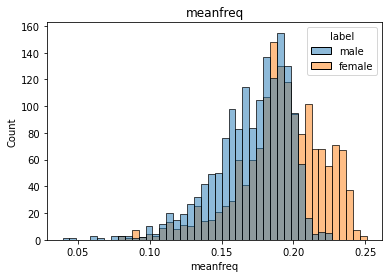

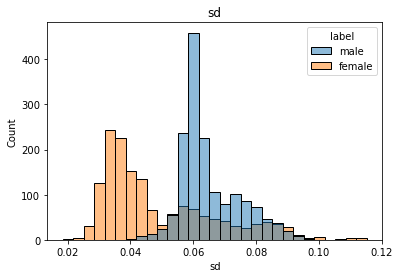

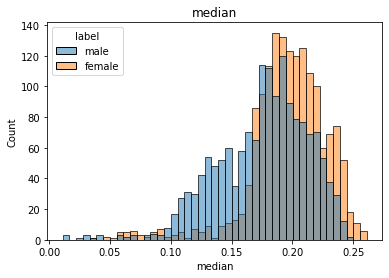

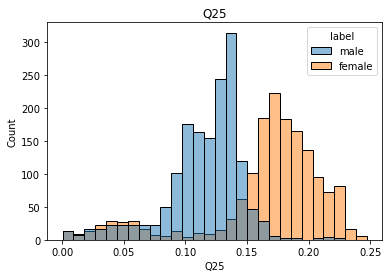

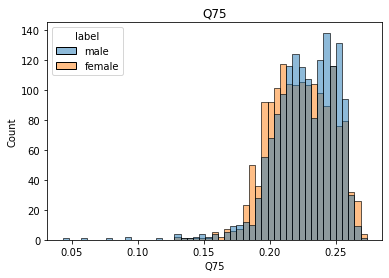

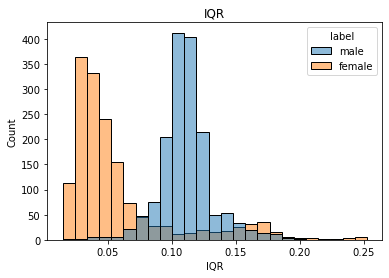

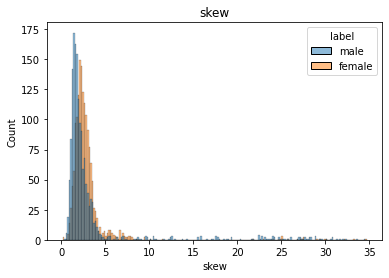

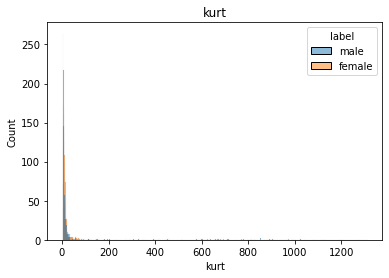

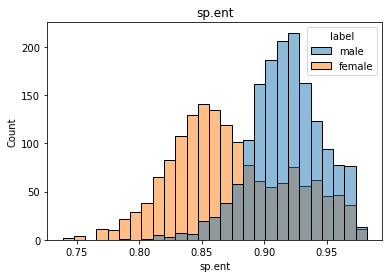

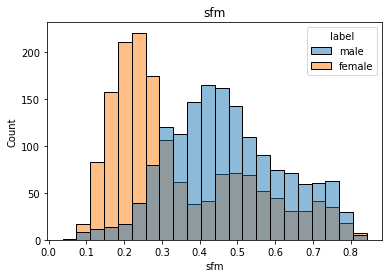

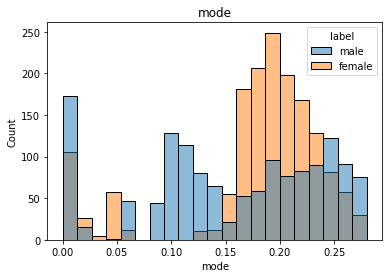

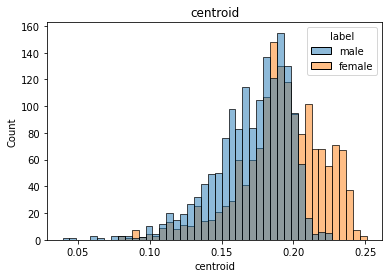

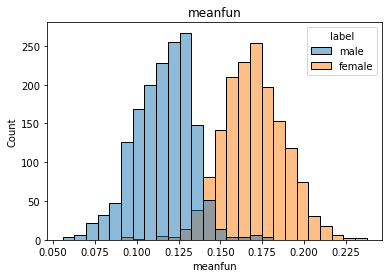

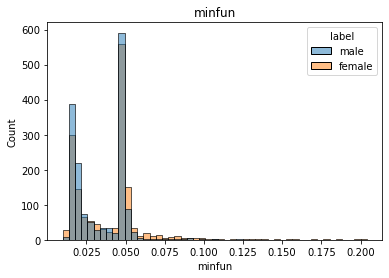

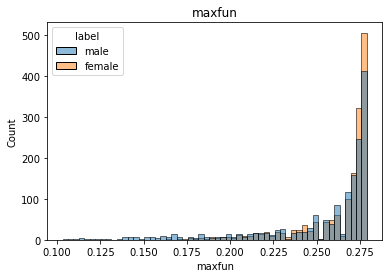

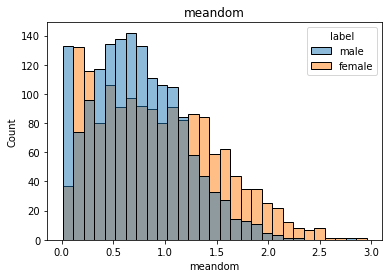

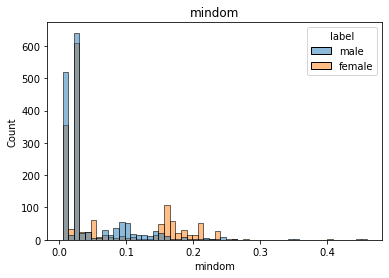

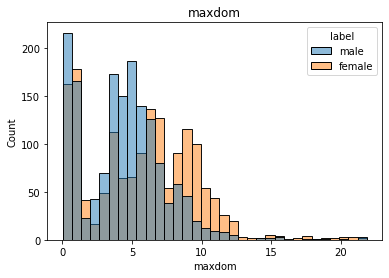

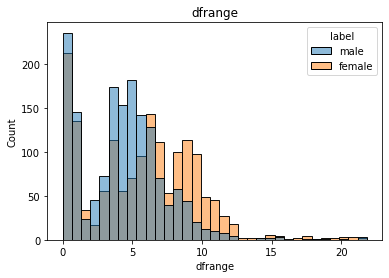

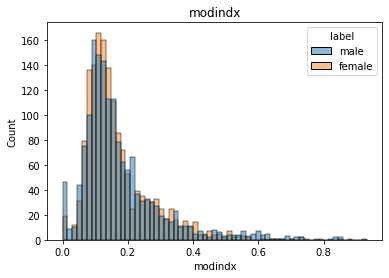

In [56]:
for i in data.drop(columns ='label').columns:
  sns.histplot(data=data,x=i,hue='label')
  plt.title(i)
  plt.show()

From the graphs above we can see that almost every independent variable highest value is Male's

In [57]:
data.label.value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [58]:
data.label.count()

3168

Total number of observations are 3168 and is equally divided between both labels

# Separating Independent and Dependent Variable

In [59]:
X = data.drop(columns='label',axis=1)

In [60]:
y= data['label']

In [61]:
y

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

# Encoding of Data

In [62]:
y=pd.get_dummies(data=y,drop_first =True)

In [63]:
y

,male
0,1
1,1
2,1
3,1
4,1
...,...
3163,0
3164,0
3165,0
3166,0


# IMPUTING DATA

In [70]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [71]:
trf1= ColumnTransformer([
    ('Imputer',SimpleImputer(strategy='mean'),['mode'])
                        ],remainder = 'passthrough')

# Scale the data

In [72]:
from sklearn.preprocessing import StandardScaler
trf2 = ColumnTransformer([
    ('Scaler', StandardScaler(),slice(0,20))
],remainder ='passthrough')

 Train Test Split



In [73]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.30,random_state =121)

In [74]:
from sklearn.linear_model import SGDClassifier
trf3 = SGDClassifier(loss = 'log')

In [75]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(trf1 , trf2,trf3)

In [76]:
pipe.fit(X_train,y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Imputer', SimpleImputer(),
                                                  ['mode'])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaler', StandardScaler(),
                                                  slice(0, 20, None))])),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [81]:
y_pred=pipe.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [83]:
confusion_matrix(y_test,y_pred)

array([[428,  20],
       [ 14, 489]], dtype=int64)

In [84]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       448
           1       0.96      0.97      0.97       503

    accuracy                           0.96       951
   macro avg       0.96      0.96      0.96       951
weighted avg       0.96      0.96      0.96       951



In [85]:
y_trainpred=pipe.predict(X_train)

In [86]:
print(classification_report(y_train , y_trainpred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1136
           1       0.97      0.97      0.97      1081

    accuracy                           0.97      2217
   macro avg       0.97      0.97      0.97      2217
weighted avg       0.97      0.97      0.97      2217



As we can see according to the classification report the model is very goot in predicting both labels and is 96% accurate.

In [87]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test , y_pred))

0.92820378454474


As the kappa score is 0.92 we can say that predicted and actual are very close

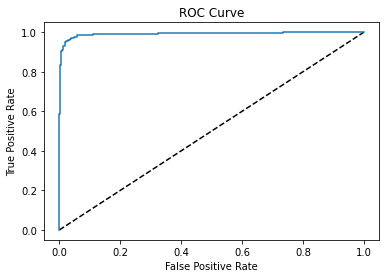

In [88]:
from sklearn.metrics import roc_curve
y_pred_prob = pipe.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()